<a href="https://colab.research.google.com/github/Aman-7745/Statistics/blob/main/prob_Dist_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd

In [46]:
import random

In [47]:
L =[]
for i in range(1000):
  L.append(random.randint(1,6))


In [48]:
len(L)

1000

In [49]:
L[:5]

[5, 4, 6, 4, 2]

In [50]:
p = pd.Series(L)

In [51]:
p

,0
0,5
1,4
2,6
3,4
4,2
...,...
995,5
996,6
997,1
998,2


In [52]:
pd.Series(L).value_counts()

,count
4,174
2,174
6,167
3,166
5,163
1,156


In [53]:
pd.Series(L).value_counts().sum()

np.int64(1000)

In [54]:
s =(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum())

In [55]:
s

,count
4,0.174
2,0.174
6,0.167
3,0.166
5,0.163
1,0.156


<Axes: >

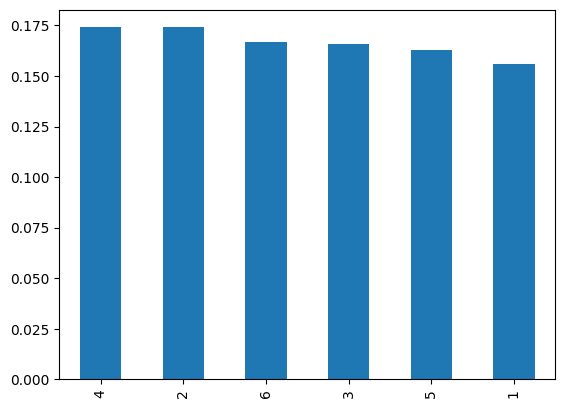

In [56]:
s.plot(kind='bar')

# Probability Density Estimation

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc =50, scale =5, size =1000)


(array([ 2.,  2.,  2.,  2.,  0.,  3.,  2.,  3.,  6.,  5., 13., 11., 22.,
        29., 21., 33., 26., 33., 38., 53., 65., 57., 56., 44., 54., 61.,
        42., 62., 39., 34., 36., 33., 31., 16., 12.,  8., 11., 11., 10.,
         5.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([33.80870839, 34.50224793, 35.19578746, 35.889327  , 36.58286653,
        37.27640607, 37.96994561, 38.66348514, 39.35702468, 40.05056421,
        40.74410375, 41.43764329, 42.13118282, 42.82472236, 43.51826189,
        44.21180143, 44.90534097, 45.5988805 , 46.29242004, 46.98595957,
        47.67949911, 48.37303865, 49.06657818, 49.76011772, 50.45365725,
        51.14719679, 51.84073633, 52.53427586, 53.2278154 , 53.92135493,
        54.61489447, 55.30843401, 56.00197354, 56.69551308, 57.38905261,
        58.08259215, 58.77613169, 59.46967122, 60.16321076, 60.8567503 ,
        61.55028983, 62.24382937, 62.9373689 , 63.63090844, 64.32444798,
        65.01798751, 65.71152705, 66.40506658, 67.09860612,

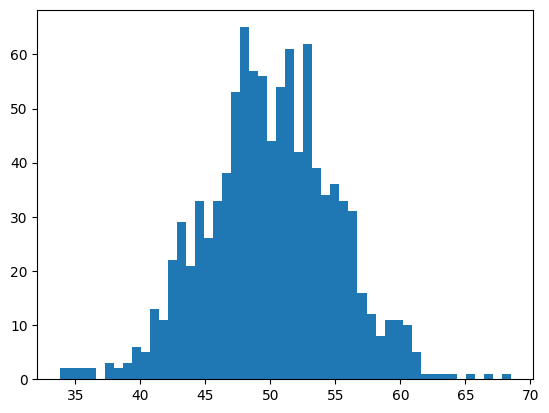

In [58]:
plt.hist(sample, bins =50)

In [59]:
sample_mean = sample.mean()
sample_std = sample.std()

In [60]:
sample_std

np.float64(4.985020210990182)

In [61]:
from scipy.stats import norm
dist = norm(60,12)

In [62]:
sample.max()

np.float64(68.48568519153608)

In [63]:
values = np.linspace(sample.min(), sample.max(), 100)

In [64]:
prob= [dist.pdf(value) for value in values]

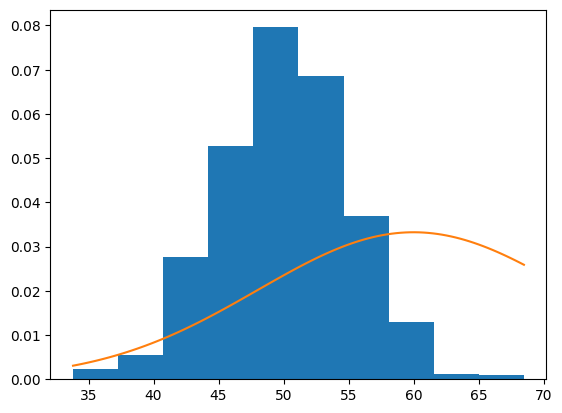

In [65]:
plt.hist(sample, bins =10, density =True)
plt.plot(values, prob)

KDE

In [66]:
sample1 = normal(loc=20, scale =5, size =300)
sample2 = normal (loc=40, scale =5, size =700)
sample = np.hstack((sample1, sample2))

In [67]:
sample.shape

(1000,)

(array([ 2.,  4.,  7.,  4.,  7., 15., 18., 13., 11., 16., 19., 29., 25.,
        19., 27., 18., 14., 13., 10., 16., 11., 13.,  7.,  8., 22., 10.,
        29., 27., 29., 41., 44., 55., 52., 57., 56., 38., 45., 37., 29.,
        21., 23., 23., 11.,  8.,  5.,  4.,  3.,  2.,  1.,  2.]),
 array([ 8.84410031,  9.77734126, 10.71058221, 11.64382316, 12.5770641 ,
        13.51030505, 14.443546  , 15.37678695, 16.3100279 , 17.24326885,
        18.1765098 , 19.10975075, 20.04299169, 20.97623264, 21.90947359,
        22.84271454, 23.77595549, 24.70919644, 25.64243739, 26.57567833,
        27.50891928, 28.44216023, 29.37540118, 30.30864213, 31.24188308,
        32.17512403, 33.10836498, 34.04160592, 34.97484687, 35.90808782,
        36.84132877, 37.77456972, 38.70781067, 39.64105162, 40.57429256,
        41.50753351, 42.44077446, 43.37401541, 44.30725636, 45.24049731,
        46.17373826, 47.1069792 , 48.04022015, 48.9734611 , 49.90670205,
        50.839943  , 51.77318395, 52.7064249 , 53.63966585,

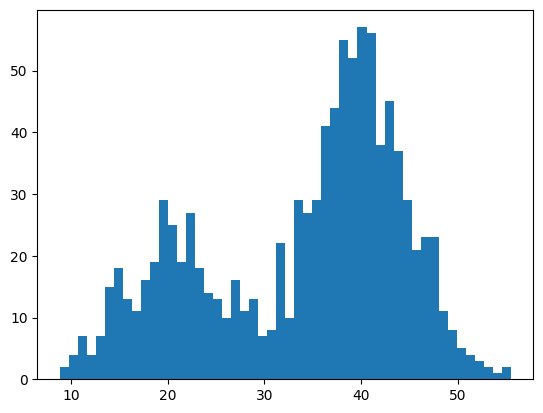

In [68]:
plt.hist(sample, bins=50)

In [69]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel ='gaussian')

## conver data into 2d array

sample = sample.reshape(len(sample),1)



In [70]:
sample.shape

(1000, 1)

In [71]:
model.fit(sample)

KernelDensity(bandwidth=5)

In [72]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape(len(values),1)

In [76]:
prob = model.score_samples(values)
prob = np.exp(prob)

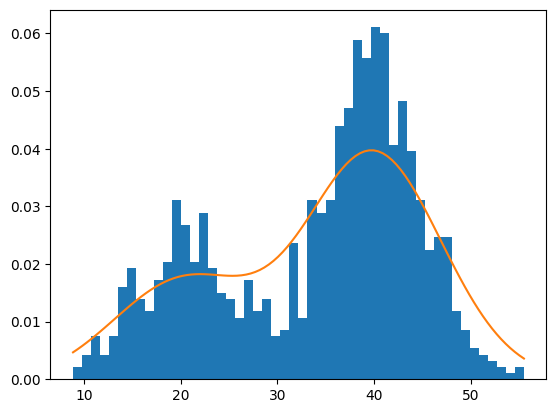

In [75]:
plt.hist(sample, bins =50, density =True)
plt.plot(values, prob)
plt.show()

<Axes: ylabel='Density'>

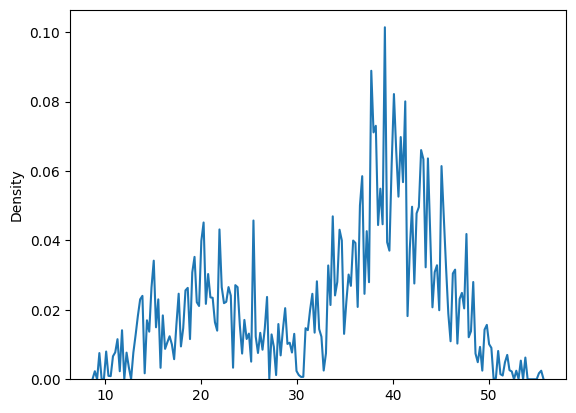

In [80]:
import seaborn as sns
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)